In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

def quantile_normalization(df, method='median', reference=None):
    """
    Quantile Normalization Descriptions
    -------------------------------------------------------
    https://adnoctum.tistory.com/184
    https://naturale0.github.io/2019/07/19/Quantile-Normalization

    Parameters
    --------------------------------------------------------
    df : pandas.DataFrame
    method : method that replace sorted values, default = 'median'
            'median', 'mean'
    reference : default = None
            None, 'std', array-like 
    
    Returns
    --------------------------------------------------------
    data_norm
    """
    # Null Check
    assert df.isna().sum().sum() == 0, "There is null value(s) in dataframe."
    
    # Sort values by each columns
    column_names = list(range(df.shape[1]))
    values_sorted = [df[column].sort_values() for column in column_names]
    idx_sorted = [value.index for value in values_sorted]
    
    # Make median(mean) values
    if reference is None:    
        sorted_df = pd.DataFrame([value.reset_index(drop=True) for value in values_sorted]).T
        me = sorted_df.agg(func=method, axis=1)
    elif reference == 'std':
        points = np.linspace(0, 1.0, 101, endpoint=False)
        me = norm.ppf(points)[1:]
    else:
        me = reference
    
    # Return normalized data
    if reference is None:
        normalized_df = pd.DataFrame(me[idx].reset_index(drop=True) for idx in idx_sorted).T
    else:
        normalized_df = pd.DataFrame(me[idx] for idx in idx_sorted).T
    
    return normalized_df

In [2]:
A = np.random.normal(5, 1, 100)
B = np.random.normal(3, 1.5, 100)
C = np.random.normal(4, 2, 100)

df = pd.DataFrame([A, B, C]).T

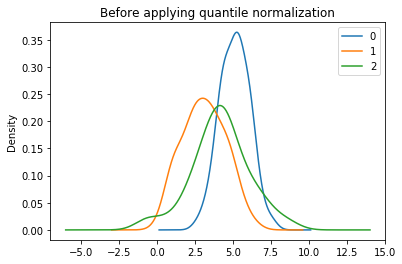

In [3]:
df.plot(kind='kde', title='Before applying quantile normalization')
plt.show()

In [4]:
qn_median_df = quantile_normalization(df, 'median')

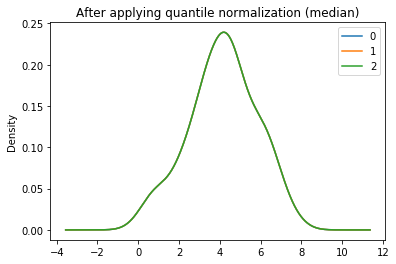

In [5]:
qn_median_df.plot(kind='kde', title='After applying quantile normalization (median)')
plt.show()

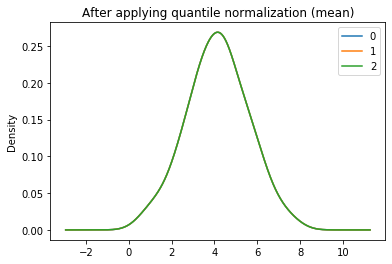

In [6]:
qn_mean_df = quantile_normalization(df, 'mean')
qn_mean_df.plot(kind='kde', title='After applying quantile normalization (mean)')
plt.show()

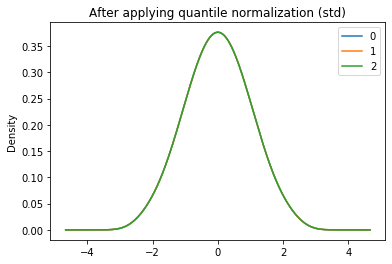

In [7]:
qn_ref_df = quantile_normalization(df, reference='std')
qn_ref_df.plot(kind='kde', title='After applying quantile normalization (std)')
plt.show()

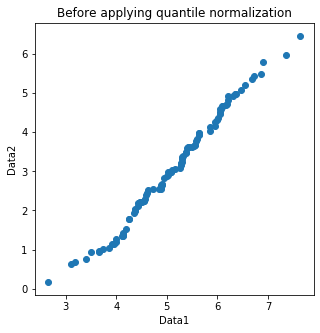

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(x=df[0].sort_values(), y=df[1].sort_values())
plt.title('Before applying quantile normalization')
plt.xlabel('Data1')
plt.ylabel('Data2')
plt.show()

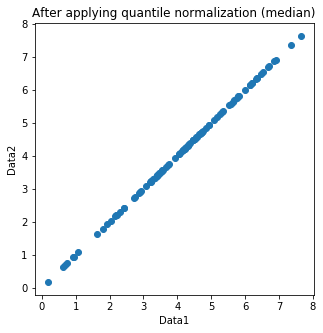

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(x=qn_median_df[0].sort_values(), y=qn_median_df[1].sort_values())
plt.title('After applying quantile normalization (median)')
plt.xlabel('Data1')
plt.ylabel('Data2')
plt.show()